In [1]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [2]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, mac_reg, ineq_range=range(7)):

    inequality_opt_dicts = []

    for i in ineq_range:
        inequality_tag = "I_" + str(i) + "_"
        
        regex = mac_reg + inequality_tag + r".*"    
        files = get_data_files(path, regex)
        inequality_opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return inequality_opt_dicts

## Mac Data Analysis

In [3]:
data_path = "../data/33-22-2_multiaccess_twotrit_simulations/"

qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^qmac_")
eatx_mac_opt_dicts = get_inequality_opt_dicts(data_path, r"^eatx_mac_")
eatx_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^eatx_qmac_")
ghza_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_cmac_")
ghza_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_qmac_")

gea_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^gea_cmac_")
gea_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^gea_qmac_")


# ghza_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_qmac_")
# ea3_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea3_cmac_")
# ea3_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea3_qmac_")
# ea_txrx_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea_txrx_cmac_")
# ghza_cmac_no_locc_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_cmac_no_locc_")

In [4]:
# MA network simulation game examples
data_path = "../data/33-22-3_multiaccess_violations/"

eatx_mac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^eatx_mac_", ineq_range=range(7))
eatx_qmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^eatx_qmac_", ineq_range=range(7))
gea_cmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^gea_cmac_", ineq_range=range(7))
gea_qmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^gea_cmac_", ineq_range=range(7))


qmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^qmac_", ineq_range=range(7))



## Analyzing Data

In [5]:
multiaccess_twotrit_witnesses = mac.multiaccess_twotrit_witnesses()


def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    unscaled_max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        if len(opt_dicts) > 0:

            cbound = inequality[0]
            cbounds += [cbound]

            qbound = 0.0
            for x in range(9):
                qbound += max(inequality[1][:,x])
            qbounds += [qbound]
            unscaled_max_violations += [max([max(opt_dict["scores"]) for opt_dict in opt_dicts])]
            max_violations += [(unscaled_max_violations[i] - cbound) / (qbound - cbound)] 

    return max_violations, qbounds, cbounds, unscaled_max_violations

print(len(gea_cmac_opt_dicts))

qmac_max_violations, qbounds, cbounds, unscaled_qmac_max_violations = analyze_data(qmac_opt_dicts, multiaccess_twotrit_witnesses)
eatx_mac_max_violations, qbounds, cbounds, unscaled_eatx_mac_max_violations = analyze_data(eatx_mac_opt_dicts, multiaccess_twotrit_witnesses)
eatx_qmac_max_violations, qbounds, cbounds, unscaled_eatx_qmac_max_violations = analyze_data(eatx_qmac_opt_dicts, multiaccess_twotrit_witnesses)
ghza_cmac_max_violations, qbounds, cbounds, unscaled_ghza_cmac_max_violations = analyze_data(ghza_cmac_opt_dicts, multiaccess_twotrit_witnesses)
ghza_qmac_max_violations, qbounds, cbounds, unscaled_ghza_qmac_max_violations = analyze_data(ghza_qmac_opt_dicts, multiaccess_twotrit_witnesses)

gea_cmac_max_violations, qbounds, cbounds, unscaled_gea_cmac_max_violations = analyze_data(gea_cmac_opt_dicts, multiaccess_twotrit_witnesses)
gea_qmac_max_violations, qbounds, cbounds, unscaled_gea_qmac_max_violations = analyze_data(gea_qmac_opt_dicts, multiaccess_twotrit_witnesses)



7


In [6]:
mac_sim_games = mac.bisender_mac_qubit_simulation_games()

qmac_max_violations2, qbounds2, cbounds2, unscaled_qmac_max_violations2 = analyze_data(qmac_opt_dicts2, mac_sim_games)
eatx_mac_max_violations2, qbounds2, cbounds2, unscaled_eatx_mac_max_violations2 = analyze_data(eatx_mac_opt_dicts2, mac_sim_games)
eatx_qmac_max_violations2, qbounds2, cbounds2, unscaled_eatx_qmac_max_violations2 = analyze_data(eatx_qmac_opt_dicts2, mac_sim_games)
gea_cmac_max_violations2, qbounds2, cbounds2, unscaled_gea_cmac_max_violations2 = analyze_data(gea_cmac_opt_dicts2, mac_sim_games)
gea_qmac_max_violations2, qbounds2, cbounds2, unscaled_gea_qmac_max_violations2 = analyze_data(gea_qmac_opt_dicts2, mac_sim_games)


AttributeError: module 'multiple_access_channels' has no attribute 'bisender_mac_qubit_simulation_games'

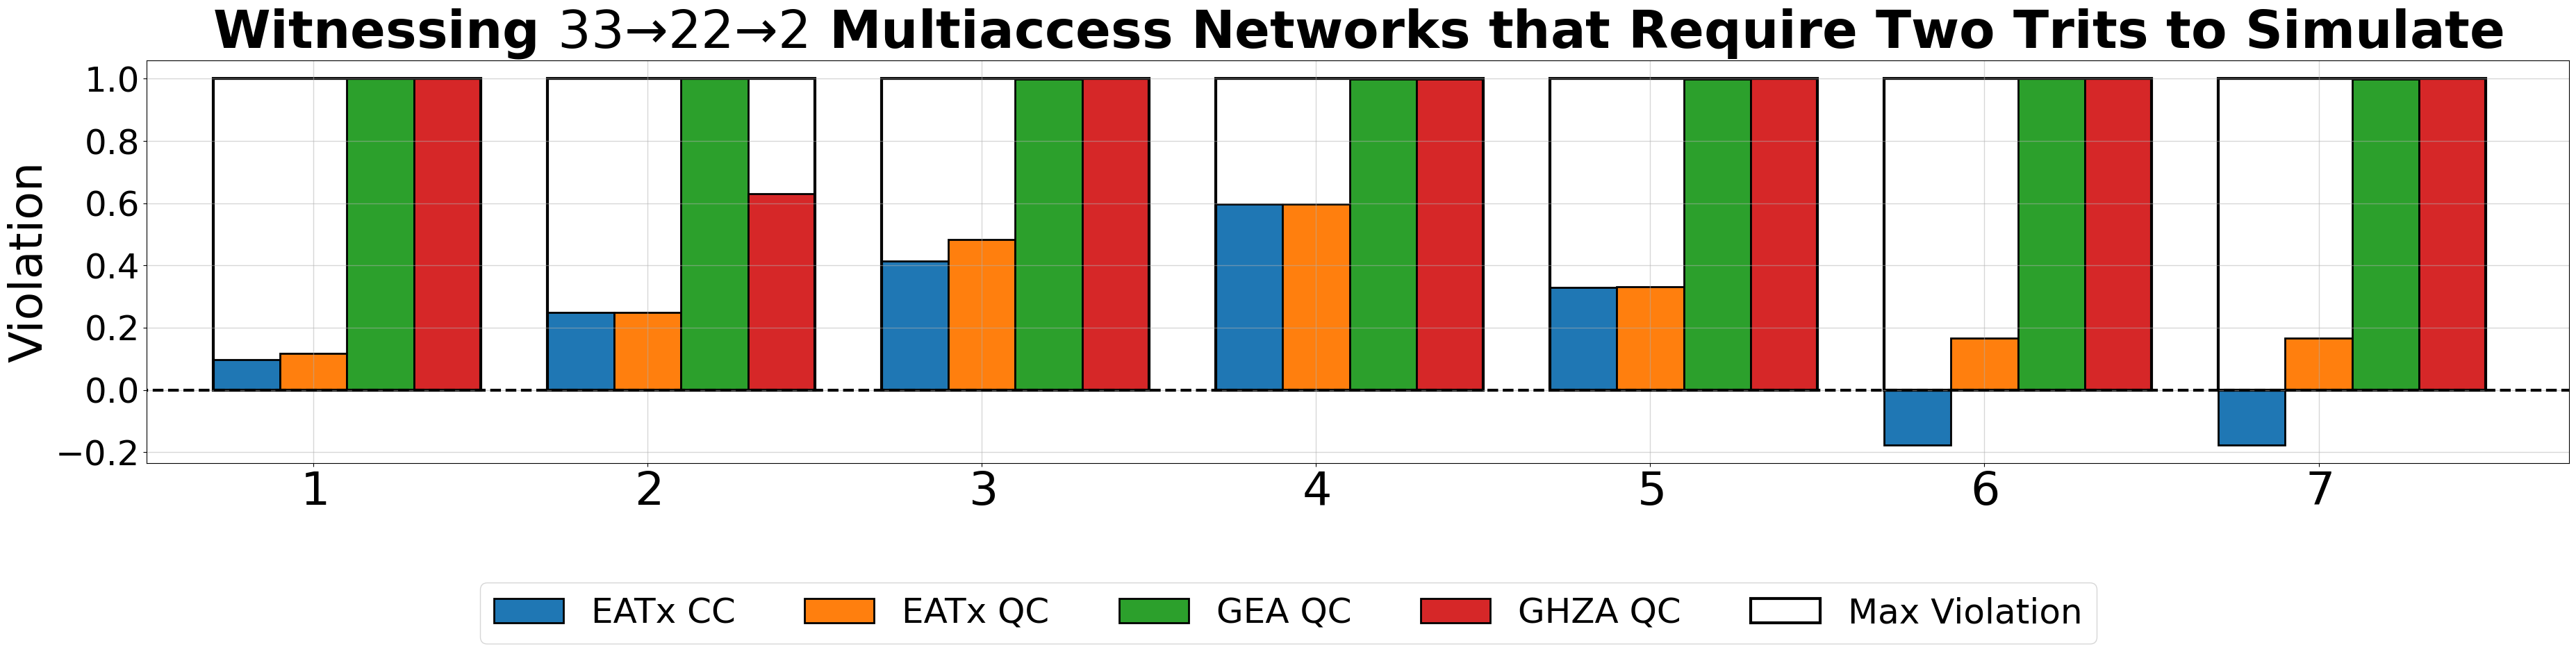

In [6]:
x_labels = [r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$",r"$7$"]

x_axis = np.arange(7)

width = 1/5

fig = plt.figure(figsize=(45, 10))
plt.grid(linewidth=1, alpha=0.5)


# plt.bar(x_axis-1*width, qmac_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
plt.bar(x_axis-1*width, eatx_mac_max_violations, width=width, label="EATx CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+0*width, eatx_qmac_max_violations, width=width, label="EATx QC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+2*width, ghza_cmac_max_violations, width=width, label="GHZA CC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+3*width, gea_cmac_max_violations, width=width, label="GEA CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+1*width, gea_qmac_max_violations, width=width, label="GEA QC", edgecolor="black", linewidth=2)
plt.bar(x_axis+2*width, ghza_qmac_max_violations, width=width, label="GHZA QC", edgecolor="black", linewidth=2)





# plt.bar(x_axis+1*width, quantum_bounds(), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)
plt.bar(x_axis+0.5*width, np.ones(7), width=1-width,  label="Max Violation", edgecolor="black", linewidth=3, fill=False)
plt.plot([-1,8], np.zeros(2), "k--", linewidth=3)
plt.xlim(-0.5,6.75)




plt.xticks(x_axis, x_labels, fontsize=48)
plt.title(r"Witnessing $33\to22\to2$ Multiaccess Networks that Require Two Trits to Simulate", size=54, fontweight="bold")
plt.yticks(fontsize=36)
plt.ylabel("Violation", fontsize=48)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=36)
plt.subplots_adjust(bottom=0.3)

plt.show()

/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_6845/3009335261.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + configuration_names, fontsize=32)
/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_6845/3009335261.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


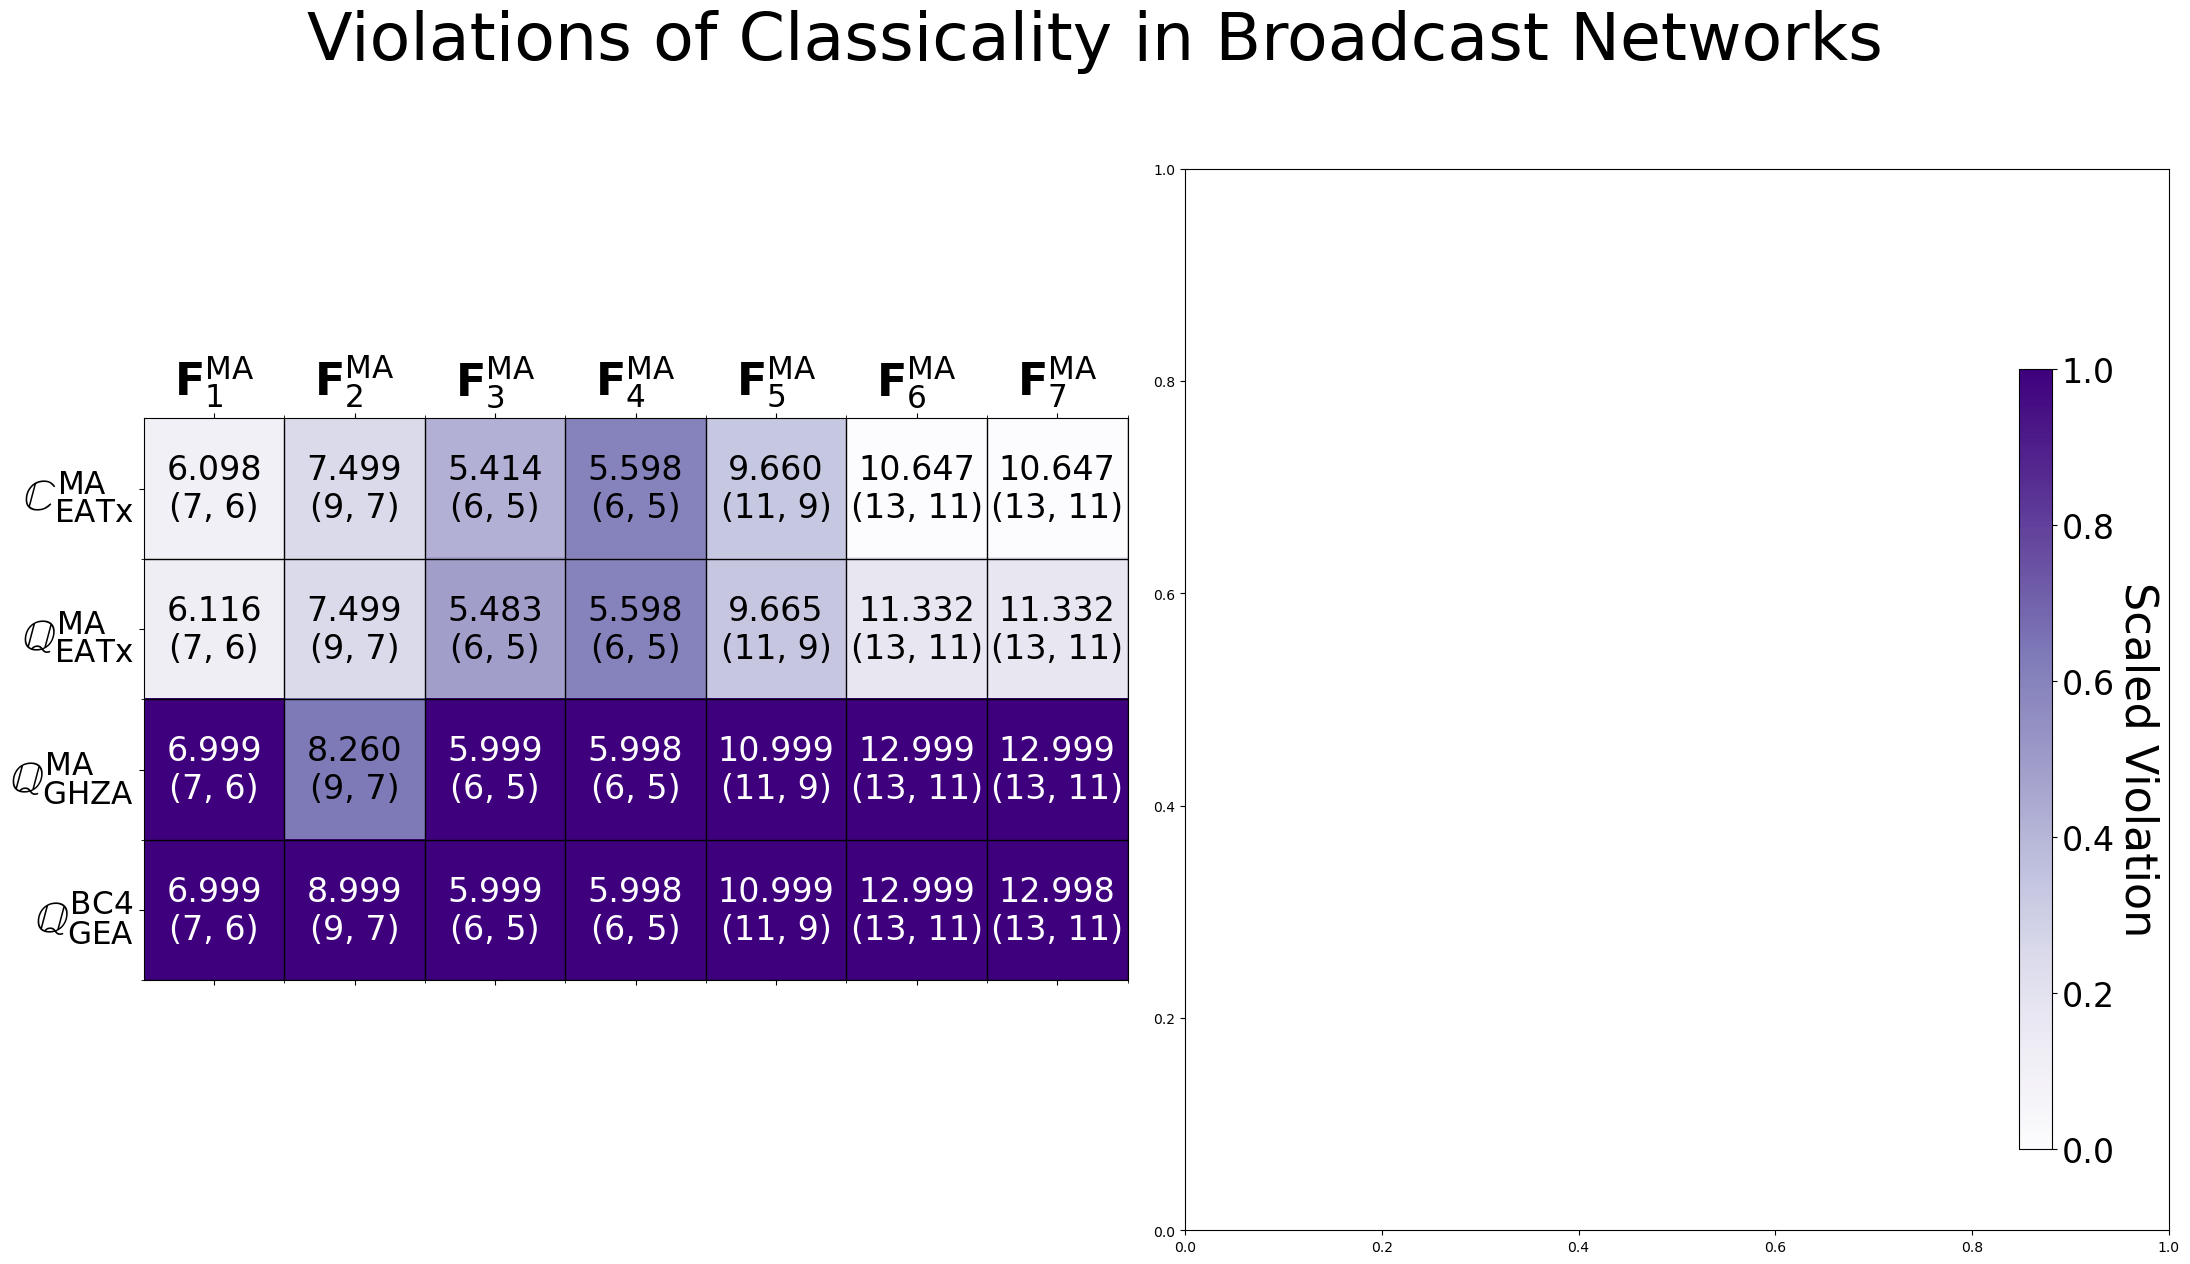

In [10]:
import matplotlib as mpl

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(22,12))

fig.suptitle("Violations of Classicality in Broadcast Networks", size=48, y=1.05)

configuration_names = [
    r"$\mathbb{C}^{\rm{MA}}_{\rm{EATx}}$",
    r"$\mathbb{Q}^{\rm{MA}}_{\rm{EATx}}$",
    r"$\mathbb{Q}^{\rm{MA}}_{\rm{GHZA}}$",
    r"$\mathbb{Q}^{\rm{BC4}}_{\rm{GEA}}$",
]

# configuration_names3 = [
#     r"$\mathbb{Q}^{\rm{BC3}}_{\rm{GHZA}}$",
#     r"$\mathbb{Q}^{\rm{BC3}}_{\rm{EAQC1}}$",
#     r"$\mathbb{Q}^{\rm{BC3}}_{\rm{EAQC2}}$",
#     r"$\mathbb{Q}^{\rm{BC3}}_{\rm{GEA}}$",
#     r"$\mathbb{Q}^{\rm{BC3}}_{\rm{EAQC}}$",
# ]
game_names = [r"$\mathbf{F}^{\rm{MA}}_1$", r"$\mathbf{F}^{\rm{MA}}_2$",r"$\mathbf{F}^{\rm{MA}}_3$", r"$\mathbf{F}^{\rm{MA}}_4$",r"$\mathbf{F}^{\rm{MA}}_5$", r"$\mathbf{F}^{\rm{MA}}_6$",r"$\mathbf{F}^{\rm{MA}}_7$"]
# game_names3 = [r"$\mathbf{F}^{\rm{BC}3}_a$",
#                r"$\mathbf{F}^{\rm{BC}3}_b$",
#                r"$\mathbf{F}^{\rm{BC}3}_c$",
#                r"$\mathbf{F}^{\rm{BC}3}_d$",
#                r"$\mathbf{F}^{\rm{BC}3}_e$",
#                r"$\mathbf{F}^{\rm{BC}3}_f$"]


cc_table_data = np.array([
    cbounds,
    cbounds,
    cbounds,
    cbounds,
])
# cc_table_data3 = np.array([
#     ghza_qc_bc_arb_cbounds3,
#     onesided_eaqc_bc_arb_cbounds3,
#     onesided2_eaqc_bc_arb_cbounds3,
#     gea_qc_bc_arb_cbounds3,
#     eaqc_bc_arb_cbounds3,
# ])


violation_table_data = np.array([
    eatx_mac_max_violations,
    eatx_qmac_max_violations,
    ghza_qmac_max_violations,
    gea_qmac_max_violations,
])
# violation_table_data3 = np.array([
#     ghza_qc_bc_arb_max_violations3,
#     onesided_eaqc_bc_arb_max_violations3,
#     onesided2_eaqc_bc_arb_max_violations3,
#     gea_qc_bc_arb_max_violations3,
#     eaqc_bc_arb_max_violations3,
# ])

unscaled_violation_table_data = np.array([
    unscaled_eatx_mac_max_violations,
    unscaled_eatx_qmac_max_violations,
    unscaled_ghza_qmac_max_violations,
    unscaled_gea_qmac_max_violations,
])

# unscaled_violation_table_data3 = np.array([
#     unscaled_ghza_qc_bc_arb_max_violations3,
#     unscaled_onesided_eaqc_bc_arb_max_violations3,
#     unscaled_onesided2_eaqc_bc_arb_max_violations3,
#     unscaled_gea_qc_bc_arb_max_violations3,
#     unscaled_eaqc_bc_arb_max_violations3,
# ])

max_table_data = np.array([
    qbounds,
    qbounds,
    qbounds,
    qbounds,
])

# max_table_data3 = np.array([
#     ghza_qc_bc_arb_qbounds3,
#     onesided_eaqc_bc_arb_qbounds3,
#     onesided2_eaqc_bc_arb_qbounds3,
#     gea_qc_bc_arb_qbounds3,
#     eaqc_bc_arb_qbounds3,
# ])


# color bar and plotting colored data
color_map_name = "Purples"
pcm = ax.matshow(violation_table_data, cmap=mpl.colormaps[color_map_name], vmax=1, vmin=0)
# pcm3 = ax3.matshow(violation_table_data3, cmap=mpl.colormaps[color_map_name], vmax=1, vmin=0)


ax.set_yticks([y + 0.5 for y in range(0, len(configuration_names))], minor=True)

ax.set_xticks([x + 0.5 for x in range(0, len(game_names))], minor=True)
ax.set_xticks([x for x in range(0, len(game_names))], minor=False)
ax.grid(which="minor", ls="-", lw=1, color="black")
ax.set_xticklabels(game_names, fontsize=32)
ax.set_yticklabels([""] + configuration_names, fontsize=32)



# ax3.set_yticks([y + 0.5 for y in range(0, len(configuration_names3))], minor=True)

# ax3.set_xticks([x + 0.5 for x in range(0, len(game_names3))], minor=True)
# ax3.set_xticks([x for x in range(0, len(game_names3))], minor=False)
# ax3.grid(which="minor", ls="-", lw=1, color="black")
# ax3.set_xticklabels(game_names3, fontsize=32)
# ax3.set_yticklabels([""] + configuration_names3, fontsize=32)

mat_num_font=24
text_color_threshold = 0.65

import decimal
decimal.getcontext().rounding = decimal.ROUND_DOWN
n_decimals = 3

for y in range(len(cc_table_data)):
    for x in range(len(cc_table_data[0])):

        cc_val = cc_table_data[y][x]
        violation_val = violation_table_data[y][x]
        max_val = max_table_data[y][x]
        unscaled_violation_val = unscaled_violation_table_data[y][x]

        text_color = "white" if violation_val >= text_color_threshold else "black"

        ax.text(x, y, str(round(decimal.Decimal(unscaled_violation_val), n_decimals)) + "\n(" + str(int(max_val)) + ", " + str(int(cc_val)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=text_color
        )

# for y in range(len(cc_table_data3)):
#     for x in range(len(cc_table_data3[0])):

#         cc_val3 = cc_table_data3[y][x]
#         violation_val3 = violation_table_data3[y][x]
#         max_val3 = max_table_data3[y][x]
#         unscaled_violation_val3 = unscaled_violation_table_data3[y][x]

#         text_color = "white" if violation_val3 >= text_color_threshold else "black"


#         ax3.text(x, y, str(round(decimal.Decimal(unscaled_violation_val3), n_decimals)) + "\n(" + str(int(max_val3)) + ", " + str(int(cc_val3)) + ")",
#             horizontalalignment='center',
#             verticalalignment='center',
#             size=mat_num_font,
#             color=text_color
#         )
       


cb_ax = fig.add_axes([0.92, 0.1, 0.015, 0.65])
cbar = fig.colorbar(pcm, cax=cb_ax)
cbar.ax.set_ylabel('Scaled Violation', rotation=270, size=32, labelpad=32)
cbar.ax.tick_params(labelsize=mat_num_font)

plt.tight_layout()